# Solucion ecuacion diferencial por ecuaciones en diferencias

La ecuacion a solucionar es

$$
y''(t)+y'(t)+y(t) = 0
$$

$y(0) = 1$

$y'(0) = -0.5$




### Ecuaciones en diferencias

se puede discretizar una ecuacion diferencial de la siguiente manera:

tomar las siguientes aproximaciones

$\frac{dy(t)}{dt}\rightarrow\frac{y[n]-y[n-1]}{Tm}$

$\frac{d^2y(t)}{dt^2}\rightarrow\frac{y[n]-2y[n-1]+y[n-2]}{Tm^2}$

$\frac{d^3y(t)}{dt^3}\rightarrow\frac{y[n]+3y[n-1]+3y[n-2]-y[n-3]}{Tm^3}$

La discretizacion de la ecuacion se realiza ase:

$y''(t)+y'(t)+y(t) = 0$ se puede transformar en:

$\frac{y[n]-2y[n-1]+y[n-2]}{Tm^2}+\frac{y[n]-y[n-1]}{Tm}+y[n]=0$

Esto se simplifica como

$\frac{y[n]-2y[n-1]+y[n-2]+Tm y[n]-Tm y[n-1] +Tm^2 y^n}{Tm^2}=0$

Simplificando nos queda

$y[n](1+Tm+Tm^2) - y[n-1](2+Tm) + y[n-2] = 0$

y las condiciones iniciales quedarian

$y(0) = 1$, entonces $y[0] = 1$

$y'(0) = -0.5$, entonces $\frac{y[1]-y[0]}{Tm} = -0.5$

sumando ambas ecuaciones nos queda que

$y[1] = 1-0.5*Tm$

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

### Solucion analitica

http://blog.espol.edu.ec/analisisnumerico/edo-lineal-solucion-complementaria-y-particular-con-sympy/

In [2]:
x = sym.Symbol('x')
h = sym.Function('h')

# Se plantea la ecuacion diferencial
f = sym.diff(h(x),x,2) + sym.diff(h(x),x,1) + h(x) 
eq = sym.Eq(f,0)

# Condiciones iniciales
h_cond = {h(0): 1, sym.diff(h(x),x,1).subs(x,0) : -0.5}



In [3]:
sym.classify_ode(eq, h(x))

('nth_linear_constant_coeff_homogeneous', '2nd_power_series_ordinary')

In [24]:
# Se soluciona la ecuacion diferencial
hc = sym.dsolve(eq, h(x), ics=h_cond)
h_c = hc.expand()

sym.pprint(eq)

sym.pprint(h_c.rhs) # rhs soo toma la solucion

sym.pprint(h_c)

                    2          
       d           d           
h(x) + ──(h(x)) + ───(h(x)) = 0
       dx           2          
                  dx           
     -x           
     ───          
      2     ⎛√3⋅x⎞
1.0⋅ℯ   ⋅cos⎜────⎟
            ⎝ 2  ⎠
            -x           
            ───          
             2     ⎛√3⋅x⎞
h(x) = 1.0⋅ℯ   ⋅cos⎜────⎟
                   ⎝ 2  ⎠


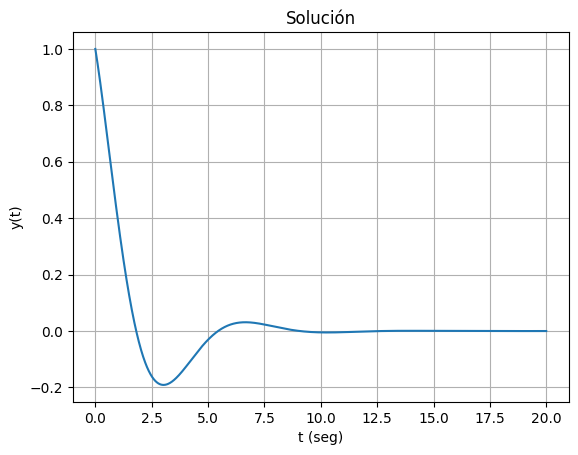

In [29]:
equivalentes = [{'DiracDelta': lambda x: 1*(x==0)},
                {'Heaviside': lambda x,y: np.heaviside(x, 1)},
                'numpy',] #, {'h':h}]
                
Tm = 0.01
xm = np.arange(0,20,Tm)
y_c = sym.lambdify(x, h_c.rhs, modules=equivalentes)
yc = y_c(xm)

plt.plot(xm,yc)
plt.xlabel("t (seg)")
plt.ylabel("y(t)")
plt.title("Solución")
plt.grid(True)

### Solucion por ecuaciones en diferencias

$y[n](1+Tm+Tm^2) - y[n-1](2+Tm) + y[n-2] = 0$

La podemos reescribir como:

$y[n] = \frac{y[n-1]*C2-y[n-2]}{C1}$

Donde $C1 = (1+Tm+Tm^2)$, $C2 = (2+Tm)$, $y[0] = 1$ y $y[1] = 1-0.5*Tm$

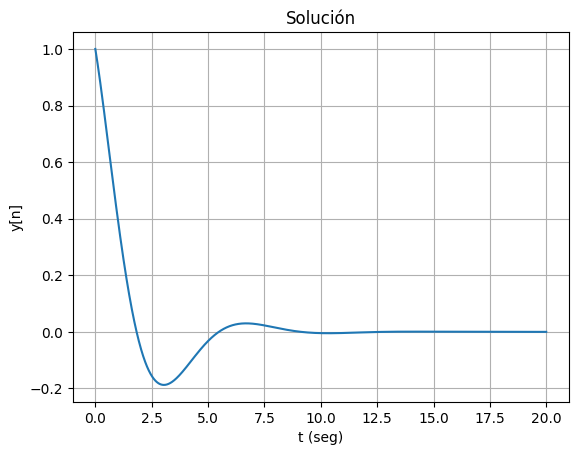

In [30]:
Tm = 0.01
t = np.arange(0,20,Tm)
y = np.zeros(len(t))

y[0] = 1
y[1] = 1-0.5*Tm # condiciones iniciales

c1 = 1+Tm+Tm**2
c2 = 2+Tm

for n in range(2,len(t)):
    y[n] = (y[n-1]*c2-y[n-2])/c1

plt.plot(t,y)
plt.xlabel("t (seg)")
plt.ylabel("y[n]")
plt.title("Solución")
plt.grid(True)
